<a href="https://colab.research.google.com/github/hdhd7/MalashinLabs/blob/main/lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

y(0.00) = -1.335761
y(0.05) = -2.674861
y(0.10) = -2.886906
y(0.15) = -2.822477
y(0.20) = -2.346733
y(0.25) = -1.412509
y(0.30) = -0.133689
y(0.35) = 1.179903
y(0.40) = 2.078479
y(0.45) = 2.145860
y(0.50) = 1.247968
y(0.55) = -0.275788
y(0.60) = -1.653550
y(0.65) = -2.048316
y(0.70) = -1.121797
y(0.75) = 0.582175
y(0.80) = 1.845971
y(0.85) = 1.632606
y(0.90) = 0.030607
y(0.95) = -1.603862
y(1.00) = -1.723671
y(1.05) = -0.129119
y(1.10) = 1.595686
y(1.15) = 1.564225
y(1.20) = -0.267184
y(1.25) = -1.783640
y(1.30) = -1.080005
y(1.35) = 1.019936
y(1.40) = 1.740514
y(1.45) = 0.023723
y(1.50) = -1.732407
y(1.55) = -0.899257
y(1.60) = 1.320493
y(1.65) = 1.425756
y(1.70) = -0.822914
y(1.75) = -1.679687
y(1.80) = 0.393793
y(1.85) = 1.754430
y(1.90) = -0.131242
y(1.95) = -1.772883
y(2.00) = 0.033166
y(2.05) = 1.767965
y(2.10) = -0.122144
y(2.15) = -1.761056
y(2.20) = 0.376900
y(2.25) = 1.681619
y(2.30) = -0.798101
y(2.35) = -1.449184
y(2.40) = 1.296692
y(2.45) = 0.928749
y(2.50) = -1.717307
y(2

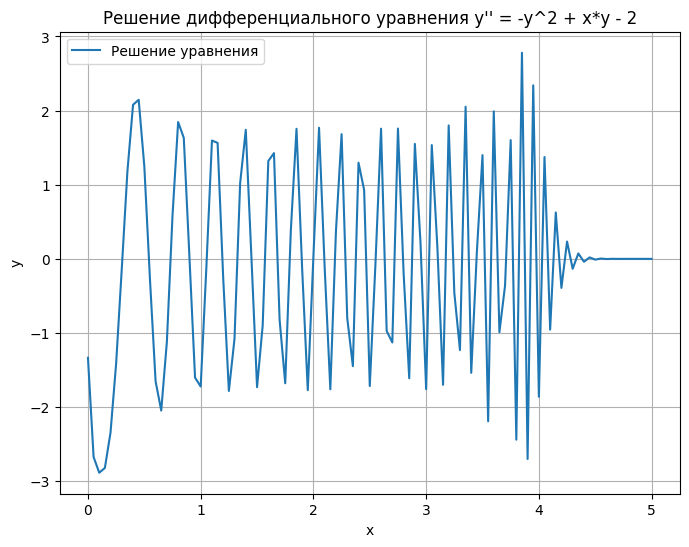

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#функция для решения системы линейных уравнений методом прогонки
def solve_tridiagonal(a, b, c, d):
    n = len(d)
    c_dash = np.zeros(n - 1)
    d_dash = np.zeros(n)
    x = np.zeros(n)

    #прямой ход прогонки
    c_dash[0] = c[0] / b[0]
    d_dash[0] = d[0] / b[0]

    for i in range(1, n - 1):
        c_dash[i] = c[i] / (b[i] - a[i - 1] * c_dash[i - 1])

    for i in range(1, n):
        d_dash[i] = (d[i] - a[i - 1] * d_dash[i - 1]) / (b[i] - a[i - 1] * c_dash[i - 1])

    #обратный ход прогонки
    x[-1] = d_dash[-1]
    for i in range(n - 2, -1, -1):
        x[i] = d_dash[i] - c_dash[i] * x[i + 1]

    return x

#пример использования для решения уравнения y'' = -y^2 + x*y - 2
#с начальными условиями y(0) = 0 и y'(0) = 1 на интервале [0, 5]

#задаем количество узлов
n = 101  #101 для более точного решения

#создаем массивы для коэффициентов трехдиагональной матрицы
a = np.ones(n - 1)
b = np.zeros(n)
c = np.ones(n - 1)
d = np.zeros(n)

#шаг по x
h = 5.0 / (n - 1)

#начальные условия
d[0] = 0.0
d[1] = 1.0

#заполняем коэффициенты матрицы и вектора d
for i in range(1, n - 1):
    b[i] = -2 - h**2 + i * h
    d[i + 1] = -2 * h**2

b[0] = -2 - h**2
b[-1] = -2 - h**2 + (n - 1) * h

solution = solve_tridiagonal(a, b, c, d)

#создаем массив для значений x
x_values = np.linspace(0, 5, n)

#выводим результаты
for i, sol in enumerate(solution):
    print(f"y({i * h:.2f}) = {sol:.6f}")


#строим график
plt.figure(figsize=(8, 6))
plt.plot(x_values, solution, label='Решение уравнения')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Решение дифференциального уравнения y'' = -y^2 + x*y - 2")
plt.legend()
plt.grid(True)
plt.show()